In [1]:
import os
import zarr
import random
import json
import warnings
import numpy as np
import pandas as pd
import torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from collections import defaultdict
import sys

warnings.filterwarnings("ignore")
sys.path.append("./src/")

from src.config import CFG
from src.dataloader import (
    read_zarr,
    read_info_json,
    scale_coordinates,
    create_dataset,
    create_segmentation_map,
    EziiDataset,
    drop_padding,
)
from src.network import UNet_2D, aug
from src.utils import save_images
from src.metric import score, create_cls_pos, create_cls_pos_sikii, create_df
from metric import visualize_epoch_results

In [2]:
train_dataset = EziiDataset(
    exp_names=CFG.train_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.train_zarr_types,
)

valid_dataset = EziiDataset(
    exp_names=CFG.valid_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.valid_zarr_types,
)

from tqdm import tqdm

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
train_nshuffle_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

for data in tqdm(train_dataset):
    normalized_tomogram = data["normalized_tomogram"]
    segmentation_map = data["segmentation_map"]
    break

# normalized_tomogram =
normalized_tomogram.shape[0]

[('TS_5_4', 'denoised'), ('TS_73_6', 'denoised'), ('TS_99_9', 'denoised'), ('TS_6_4', 'denoised'), ('TS_69_2', 'denoised')]
[('TS_86_3', 'denoised'), ('TS_6_6', 'denoised')]


  0%|          | 0/5 [00:00<?, ?it/s]


92

In [3]:
import torch
import torchvision.transforms.functional as F
import random

Train-Epoch: 0, Loss: 0.9436218627474525:  96%|█████████▌| 110/115 [00:19<00:00,  5.54it/s]
Train-nshuffle-Epoch: 0, Loss: 0.5834150702571091: 100%|██████████| 460/460 [00:16<00:00, 27.21it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 0, TRAIN_SCORE: 0.008759507189332067


Valid-Epoch: 0, Loss: 0.5023068183547129: 100%|██████████| 184/184 [00:07<00:00, 26.27it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 0, VALID_SCORE: 0.011045020818752459


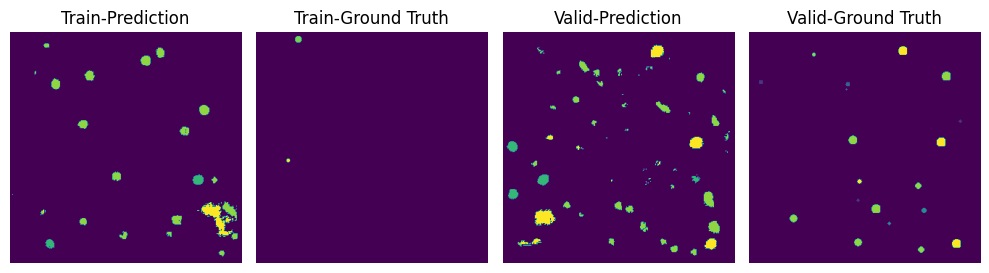

Train-Epoch: 1, Loss: 0.3232731732455167:  96%|█████████▌| 110/115 [00:19<00:00,  5.70it/s] 
Train-nshuffle-Epoch: 1, Loss: 0.3756591738080201: 100%|██████████| 460/460 [00:16<00:00, 28.05it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 1, TRAIN_SCORE: 0.03338085419097792


Valid-Epoch: 1, Loss: 0.4961254459441356: 100%|██████████| 184/184 [00:06<00:00, 27.28it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 1, VALID_SCORE: 0.02894406123594439


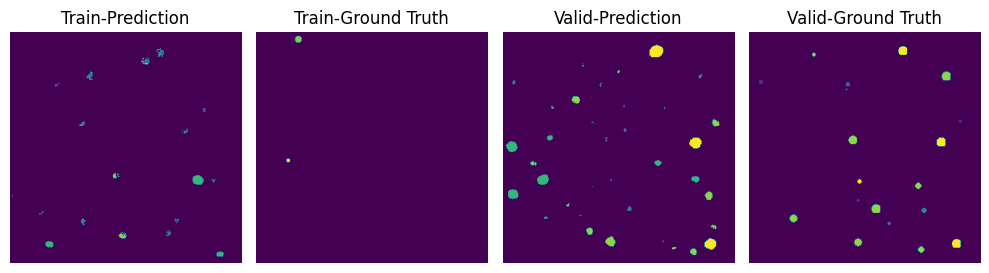

Train-Epoch: 2, Loss: 0.20578207962892273:  96%|█████████▌| 110/115 [00:18<00:00,  5.82it/s]
Train-nshuffle-Epoch: 2, Loss: 0.4217869045192619: 100%|██████████| 460/460 [00:16<00:00, 27.59it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 2, TRAIN_SCORE: 0.1877420342872465


Valid-Epoch: 2, Loss: 0.5190877509708314: 100%|██████████| 184/184 [00:06<00:00, 27.37it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 2, VALID_SCORE: 0.1822316131906383


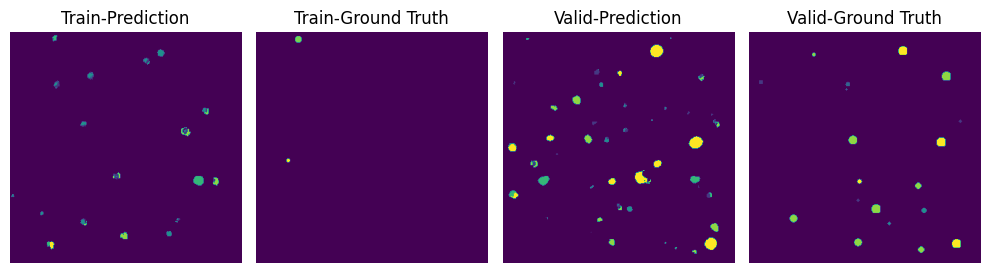

Train-Epoch: 3, Loss: 0.152437117153948:  96%|█████████▌| 110/115 [00:18<00:00,  5.88it/s]  
Train-nshuffle-Epoch: 3, Loss: 0.15739137225723623: 100%|██████████| 460/460 [00:16<00:00, 27.77it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 3, TRAIN_SCORE: 0.16639597064408035


Valid-Epoch: 3, Loss: 0.46185357392380905: 100%|██████████| 184/184 [00:06<00:00, 26.32it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 3, VALID_SCORE: 0.16375584509510388


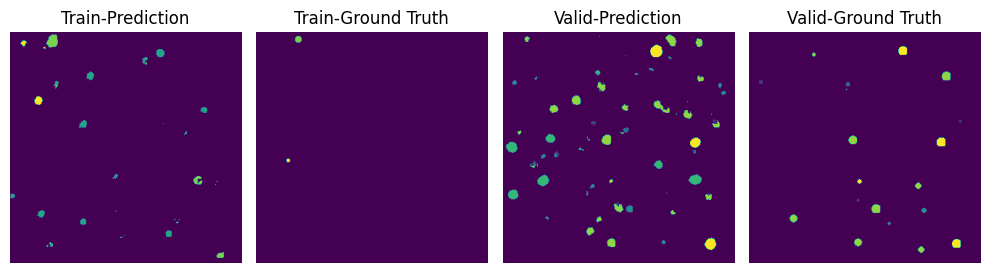

Train-Epoch: 4, Loss: 0.11699524450708519:  96%|█████████▌| 110/115 [00:18<00:00,  5.87it/s]
Train-nshuffle-Epoch: 4, Loss: 0.11768361978718768: 100%|██████████| 460/460 [00:16<00:00, 27.51it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 4, TRAIN_SCORE: 0.16306754914796665


Valid-Epoch: 4, Loss: 0.6789545965907366: 100%|██████████| 184/184 [00:07<00:00, 26.17it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 4, VALID_SCORE: 0.16829819522072537


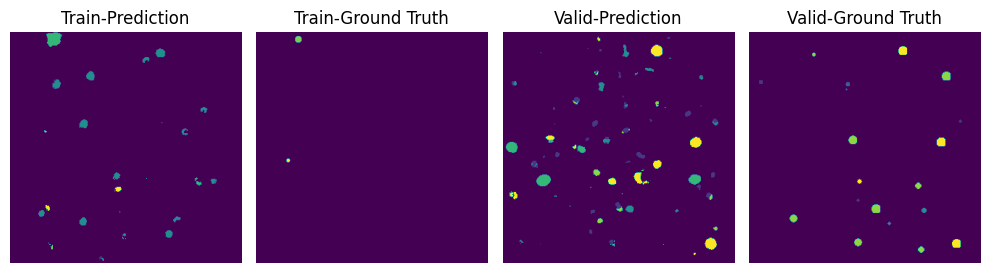

Train-Epoch: 5, Loss: 0.0855041156438264:  96%|█████████▌| 110/115 [00:18<00:00,  5.83it/s] 
Train-nshuffle-Epoch: 5, Loss: 0.11466583423417709: 100%|██████████| 460/460 [00:16<00:00, 27.74it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 5, TRAIN_SCORE: 0.03969144905373091


Valid-Epoch: 5, Loss: 0.7788191941622442: 100%|██████████| 184/184 [00:07<00:00, 25.72it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 5, VALID_SCORE: 0.0263226380112961


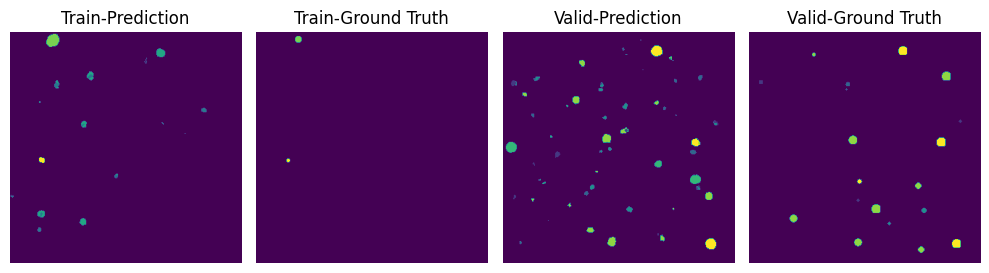

Train-Epoch: 6, Loss: 0.06267454434524883:  96%|█████████▌| 110/115 [00:19<00:00,  5.76it/s]
Train-nshuffle-Epoch: 6, Loss: 0.0469545272330794: 100%|██████████| 460/460 [00:16<00:00, 28.03it/s]  


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 6, TRAIN_SCORE: 0.032553714316719475


Valid-Epoch: 6, Loss: 0.6634124244016636: 100%|██████████| 184/184 [00:06<00:00, 26.79it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 6, VALID_SCORE: 0.03368239415596126


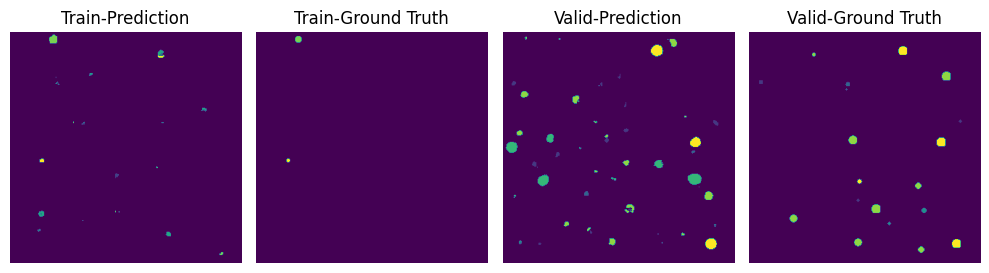

Train-Epoch: 7, Loss: 0.055339458855715666:  96%|█████████▌| 110/115 [00:18<00:00,  5.79it/s]
Train-nshuffle-Epoch: 7, Loss: 0.040524153394179176: 100%|██████████| 460/460 [00:16<00:00, 27.49it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 7, TRAIN_SCORE: 0.06543446947852215


Valid-Epoch: 7, Loss: 0.9278268730596883: 100%|██████████| 184/184 [00:06<00:00, 27.11it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 7, VALID_SCORE: 0.04740066320900323


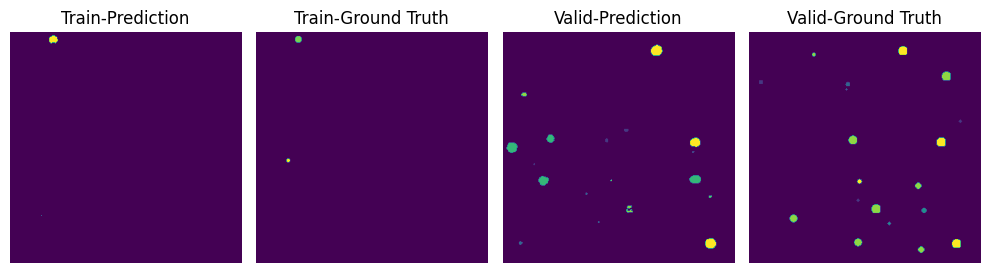

Train-Epoch: 8, Loss: 0.0429513295350427:  96%|█████████▌| 110/115 [00:18<00:00,  5.79it/s]  
Train-nshuffle-Epoch: 8, Loss: 0.04264426735715698: 100%|██████████| 460/460 [00:19<00:00, 24.14it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 8, TRAIN_SCORE: 0.051844934039317184


Valid-Epoch: 8, Loss: 1.0840228579902982: 100%|██████████| 184/184 [00:06<00:00, 26.36it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 8, VALID_SCORE: 0.03891662239447011


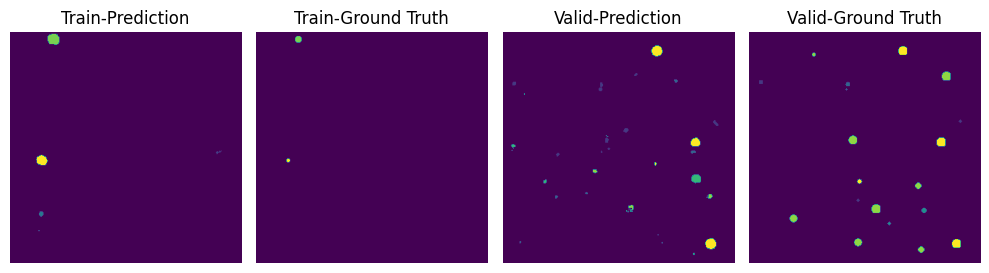

Train-Epoch: 9, Loss: 0.037670823440633036:  96%|█████████▌| 110/115 [00:18<00:00,  5.80it/s]
Train-nshuffle-Epoch: 9, Loss: 0.030595064635955446: 100%|██████████| 460/460 [00:16<00:00, 27.09it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 9, TRAIN_SCORE: 0.051764491957142035


Valid-Epoch: 9, Loss: 1.061533640956243: 100%|██████████| 184/184 [00:07<00:00, 24.77it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 9, VALID_SCORE: 0.0458575875010775


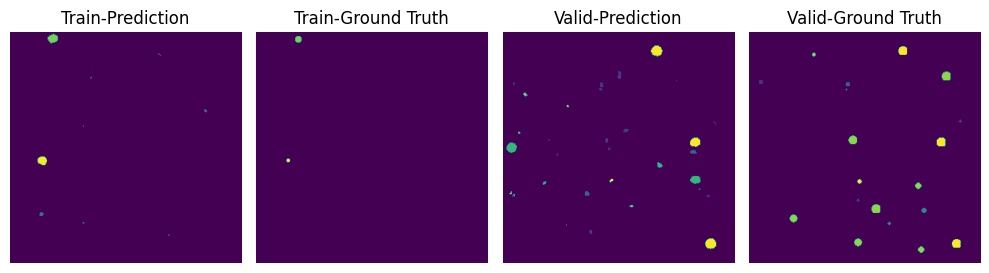

Train-Epoch: 10, Loss: 0.030902726694264197:  96%|█████████▌| 110/115 [00:19<00:00,  5.74it/s]
Train-nshuffle-Epoch: 10, Loss: 0.025188554247395824: 100%|██████████| 460/460 [00:16<00:00, 28.18it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 10, TRAIN_SCORE: 0.04121940709029905


Valid-Epoch: 10, Loss: 0.8920487546888383: 100%|██████████| 184/184 [00:06<00:00, 27.85it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 10, VALID_SCORE: 0.05058361544874082


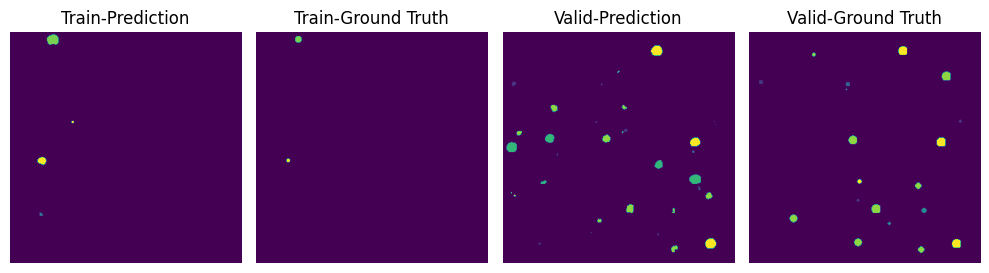

Train-Epoch: 11, Loss: 0.029079501563683153:  96%|█████████▌| 110/115 [00:21<00:00,  5.20it/s]
Train-nshuffle-Epoch: 11, Loss: 0.040010772069470714: 100%|██████████| 460/460 [00:15<00:00, 29.13it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 11, TRAIN_SCORE: 0.05560156191623592


Valid-Epoch: 11, Loss: 1.3412051897112574: 100%|██████████| 184/184 [00:06<00:00, 27.76it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 11, VALID_SCORE: 0.05611083879601109


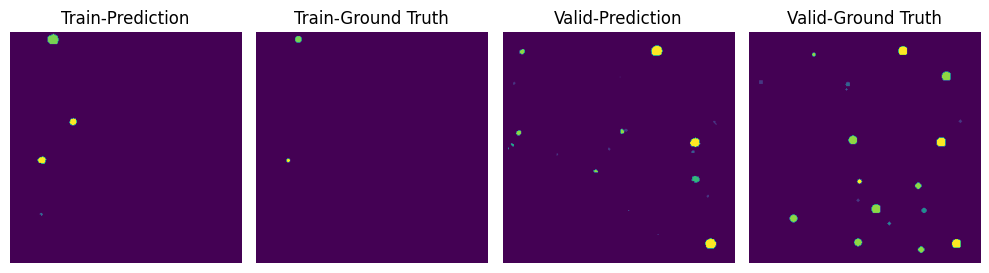

Train-Epoch: 12, Loss: 0.03146473668854345:  96%|█████████▌| 110/115 [00:18<00:00,  5.91it/s] 
Train-nshuffle-Epoch: 12, Loss: 0.024676353605109794: 100%|██████████| 460/460 [00:16<00:00, 28.08it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 12, TRAIN_SCORE: 0.060561569469716546


Valid-Epoch: 12, Loss: 1.1951733318216966: 100%|██████████| 184/184 [00:06<00:00, 29.90it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 12, VALID_SCORE: 0.051861886717987964


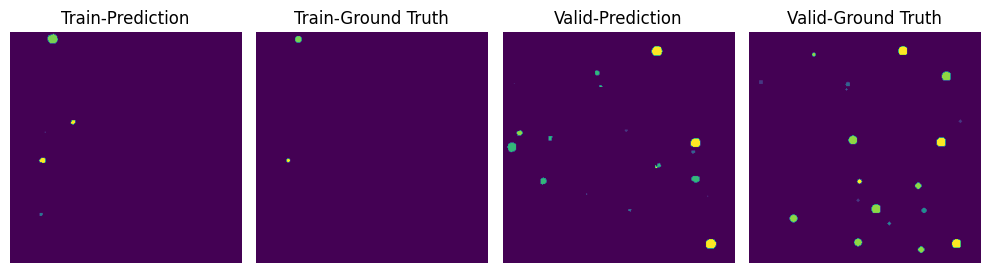

Train-Epoch: 13, Loss: 0.028486990454522045:  96%|█████████▌| 110/115 [00:18<00:00,  5.94it/s]
Train-nshuffle-Epoch: 13, Loss: 0.029451083656116997: 100%|██████████| 460/460 [00:15<00:00, 30.03it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 13, TRAIN_SCORE: 0.07195898890482617


Valid-Epoch: 13, Loss: 1.3772590872091393: 100%|██████████| 184/184 [00:06<00:00, 30.21it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 13, VALID_SCORE: 0.07234930755105615


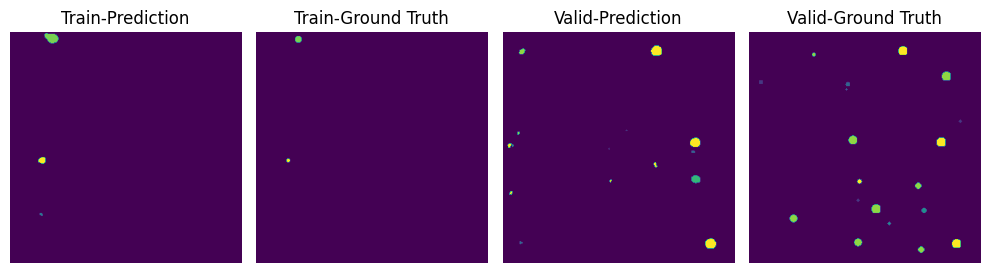

Train-Epoch: 14, Loss: 0.030001164564270186:  96%|█████████▌| 110/115 [00:18<00:00,  5.87it/s]
Train-nshuffle-Epoch: 14, Loss: 0.04802833691558234: 100%|██████████| 460/460 [00:15<00:00, 29.09it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 14, TRAIN_SCORE: 0.01818311734248098


Valid-Epoch: 14, Loss: 0.8064270901617736: 100%|██████████| 184/184 [00:06<00:00, 28.53it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 14, VALID_SCORE: 0.046042081978191485


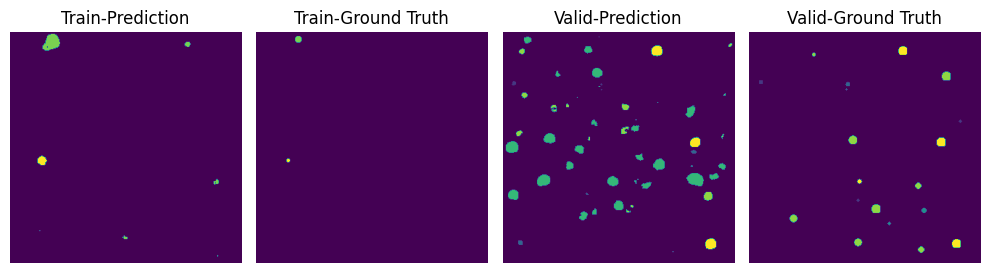

Train-Epoch: 15, Loss: 0.02735787293958393:  96%|█████████▌| 110/115 [00:19<00:00,  5.62it/s] 
Train-nshuffle-Epoch: 15, Loss: 0.01889822760827171: 100%|██████████| 460/460 [00:16<00:00, 28.70it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 15, TRAIN_SCORE: 0.06294953607933192


Valid-Epoch: 15, Loss: 1.2123465986230217: 100%|██████████| 184/184 [00:06<00:00, 27.91it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 15, VALID_SCORE: 0.05581558807089691


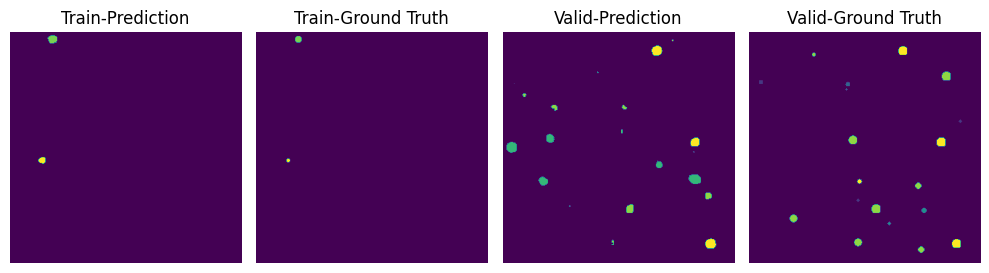

Train-Epoch: 16, Loss: 0.02452910637948662:  96%|█████████▌| 110/115 [00:18<00:00,  5.84it/s] 
Train-nshuffle-Epoch: 16, Loss: 0.020136703974466125: 100%|██████████| 460/460 [00:16<00:00, 28.13it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 16, TRAIN_SCORE: 0.06812701394649885


Valid-Epoch: 16, Loss: 1.104764021133356: 100%|██████████| 184/184 [00:06<00:00, 28.08it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 16, VALID_SCORE: 0.06070150551999219


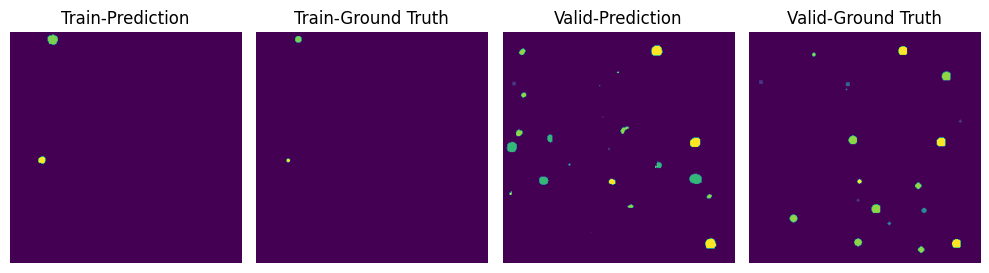

Train-Epoch: 17, Loss: 0.025764174079945818:  96%|█████████▌| 110/115 [00:18<00:00,  5.84it/s]
Train-nshuffle-Epoch: 17, Loss: 0.028470295212616254: 100%|██████████| 460/460 [00:15<00:00, 29.45it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 17, TRAIN_SCORE: 0.04225652261289951


Valid-Epoch: 17, Loss: 0.9945222133670619: 100%|██████████| 184/184 [00:06<00:00, 30.04it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 17, VALID_SCORE: 0.046998415388796


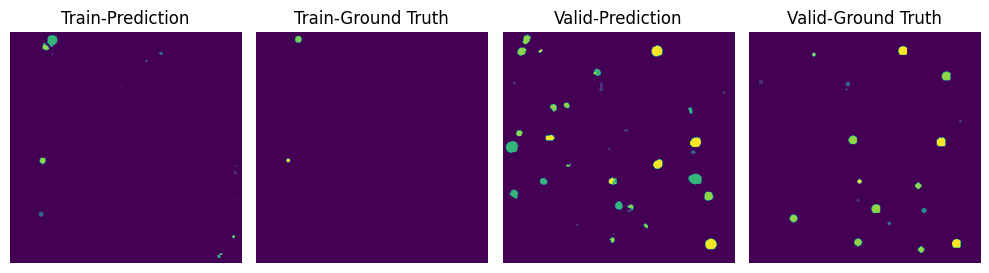

Train-Epoch: 18, Loss: 0.028491330954288557:  96%|█████████▌| 110/115 [00:19<00:00,  5.65it/s]
Train-nshuffle-Epoch: 18, Loss: 0.0432182067849562: 100%|██████████| 460/460 [00:15<00:00, 29.00it/s]  


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 18, TRAIN_SCORE: 0.07634699288197747


Valid-Epoch: 18, Loss: 1.5919774981242802: 100%|██████████| 184/184 [00:08<00:00, 22.58it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 18, VALID_SCORE: 0.06824711345423226


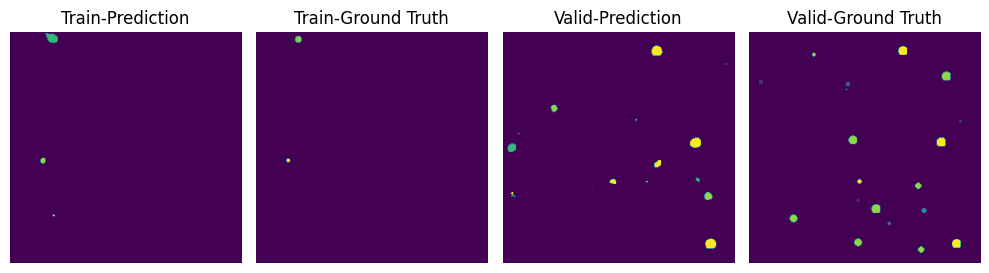

Train-Epoch: 19, Loss: 0.025284823032350027:  96%|█████████▌| 110/115 [00:18<00:00,  5.83it/s]
Train-nshuffle-Epoch: 19, Loss: 0.04571547455245467: 100%|██████████| 460/460 [00:15<00:00, 29.09it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 19, TRAIN_SCORE: 0.05727736568264204


Valid-Epoch: 19, Loss: 1.263189560920696: 100%|██████████| 184/184 [00:06<00:00, 27.84it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 19, VALID_SCORE: 0.05438952309766742


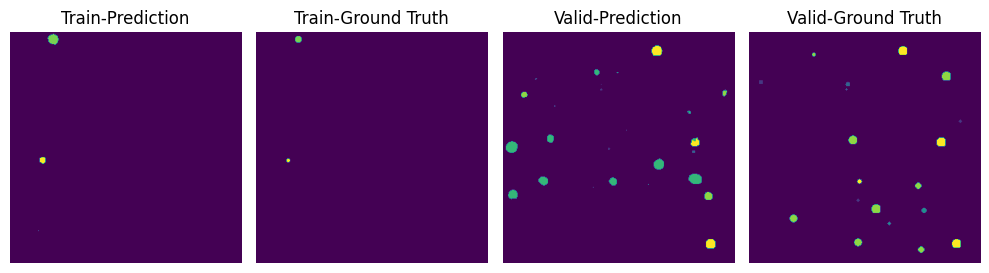

Train-Epoch: 20, Loss: 0.02559431927193972:  96%|█████████▌| 110/115 [00:19<00:00,  5.78it/s] 
Train-nshuffle-Epoch: 20, Loss: 0.023650738413055913: 100%|██████████| 460/460 [00:16<00:00, 28.10it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 20, TRAIN_SCORE: 0.04823118917062681


Valid-Epoch: 20, Loss: 1.1477704160231794: 100%|██████████| 184/184 [00:07<00:00, 25.78it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 20, VALID_SCORE: 0.05918533758559377


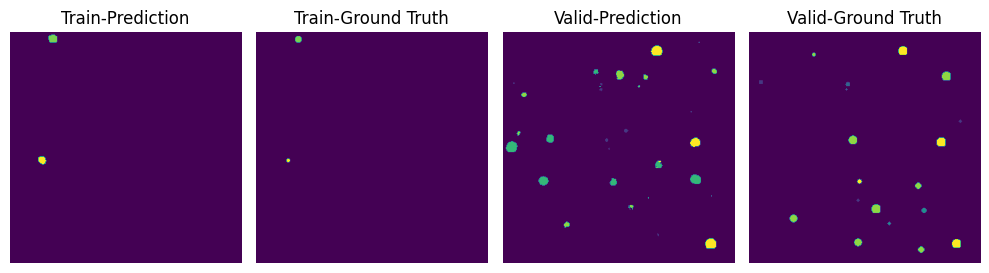

Train-Epoch: 21, Loss: 0.024799316811417654:  96%|█████████▌| 110/115 [00:19<00:00,  5.77it/s]
Train-nshuffle-Epoch: 21, Loss: 0.025169271688703348: 100%|██████████| 460/460 [00:16<00:00, 27.51it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 21, TRAIN_SCORE: 0.05178385889214572


Valid-Epoch: 21, Loss: 1.3428247218968032: 100%|██████████| 184/184 [00:07<00:00, 25.63it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 21, VALID_SCORE: 0.06319617700469911


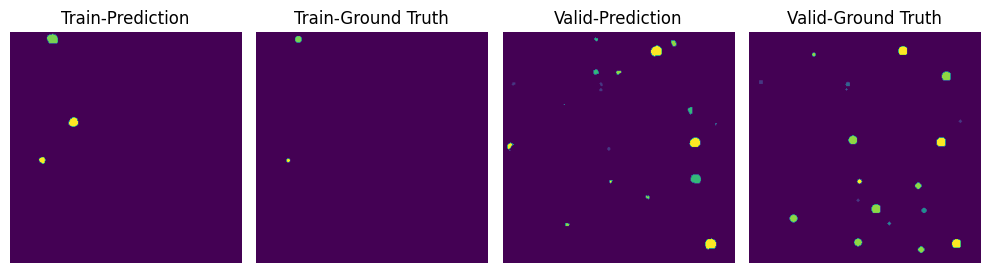

Train-Epoch: 22, Loss: 0.022679070954803714:  96%|█████████▌| 110/115 [00:19<00:00,  5.74it/s]
Train-nshuffle-Epoch: 22, Loss: 0.02055027761772457: 100%|██████████| 460/460 [00:17<00:00, 25.72it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 22, TRAIN_SCORE: 0.05750202733656262


Valid-Epoch: 22, Loss: 1.3161572619036357: 100%|██████████| 184/184 [00:06<00:00, 26.40it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 22, VALID_SCORE: 0.05874105889597234


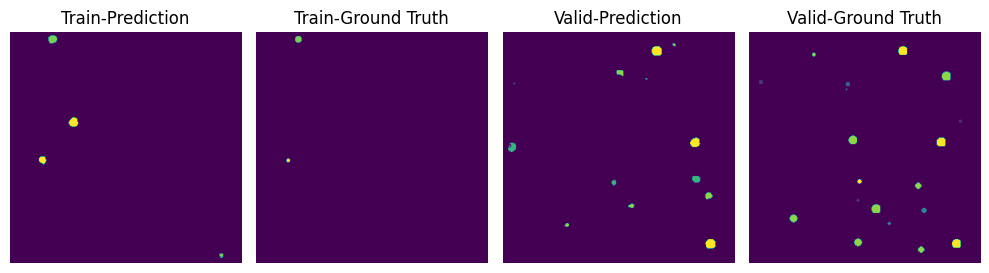

Train-Epoch: 23, Loss: 0.019279901178511367:  96%|█████████▌| 110/115 [00:19<00:00,  5.74it/s]
Train-nshuffle-Epoch: 23, Loss: 0.01475909729095925: 100%|██████████| 460/460 [00:17<00:00, 26.29it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 23, TRAIN_SCORE: 0.05770849228829035


Valid-Epoch: 23, Loss: 1.2784015714958357: 100%|██████████| 184/184 [00:07<00:00, 25.49it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 23, VALID_SCORE: 0.06670380539956518


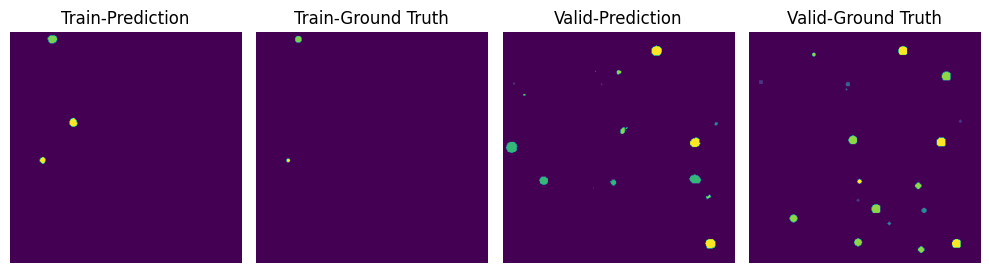

Train-Epoch: 24, Loss: 0.017583402377468617:  96%|█████████▌| 110/115 [00:18<00:00,  5.93it/s]
Train-nshuffle-Epoch: 24, Loss: 0.015315990587544587: 100%|██████████| 460/460 [00:16<00:00, 27.16it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 24, TRAIN_SCORE: 0.06481206651032334


Valid-Epoch: 24, Loss: 1.3579899422726631: 100%|██████████| 184/184 [00:06<00:00, 27.37it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 24, VALID_SCORE: 0.06063414396439344


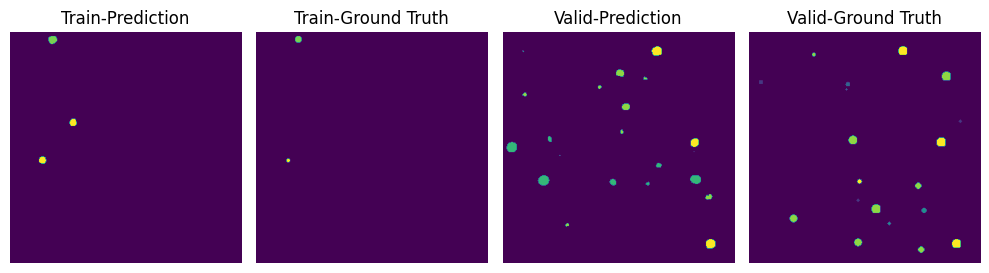

Train-Epoch: 25, Loss: 0.01701487791618671:  96%|█████████▌| 110/115 [00:18<00:00,  5.91it/s] 
Train-nshuffle-Epoch: 25, Loss: 0.013140379439004313: 100%|██████████| 460/460 [00:16<00:00, 27.56it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 25, TRAIN_SCORE: 0.07576327438773327


Valid-Epoch: 25, Loss: 1.3867858574253067: 100%|██████████| 184/184 [00:07<00:00, 26.17it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 25, VALID_SCORE: 0.06954286039168564


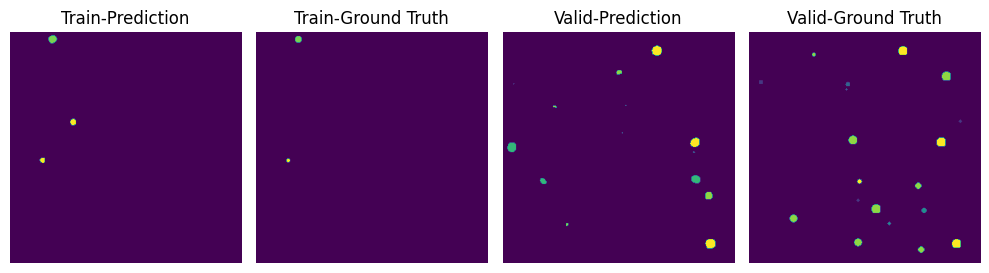

Train-Epoch: 26, Loss: 0.01624714302438819:  96%|█████████▌| 110/115 [00:18<00:00,  5.91it/s] 
Train-nshuffle-Epoch: 26, Loss: 0.01329218085840061: 100%|██████████| 460/460 [00:16<00:00, 27.28it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 26, TRAIN_SCORE: 0.06737811519136731


Valid-Epoch: 26, Loss: 1.4034982487578616: 100%|██████████| 184/184 [00:06<00:00, 26.92it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 26, VALID_SCORE: 0.0678638800986478


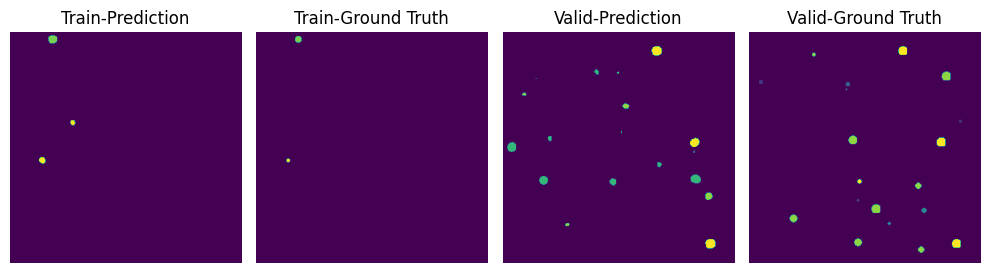

Train-Epoch: 27, Loss: 0.026260682360523126:  96%|█████████▌| 110/115 [00:18<00:00,  6.01it/s]
Train-nshuffle-Epoch: 27, Loss: 0.027866146930128982: 100%|██████████| 460/460 [00:16<00:00, 27.50it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 27, TRAIN_SCORE: 0.038451320674151315


Valid-Epoch: 27, Loss: 1.0567939795516355: 100%|██████████| 184/184 [00:06<00:00, 28.13it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 27, VALID_SCORE: 0.0482808487095262


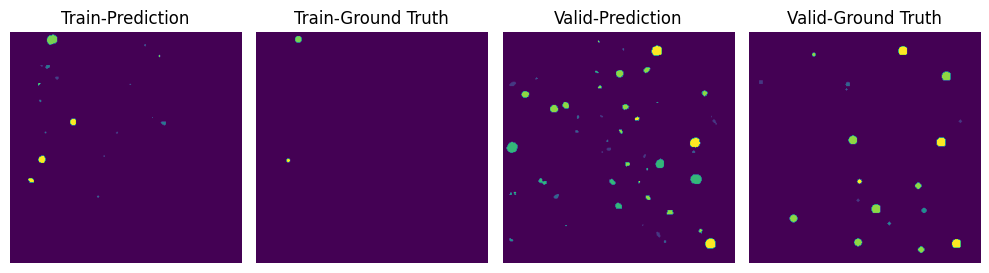

Train-Epoch: 28, Loss: 0.021951212981631132:  96%|█████████▌| 110/115 [00:18<00:00,  5.94it/s]
Train-nshuffle-Epoch: 28, Loss: 0.019215804927301613: 100%|██████████| 460/460 [00:16<00:00, 27.60it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 28, TRAIN_SCORE: 0.0651613588500926


Valid-Epoch: 28, Loss: 1.2643336321441736: 100%|██████████| 184/184 [00:06<00:00, 26.65it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 28, VALID_SCORE: 0.061059689687800595


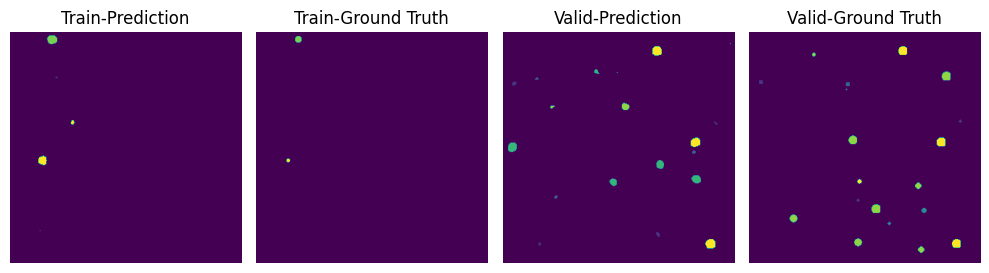

Train-Epoch: 29, Loss: 0.020058004363884472:  96%|█████████▌| 110/115 [00:18<00:00,  5.90it/s]
Train-nshuffle-Epoch: 29, Loss: 0.021761499820770594: 100%|██████████| 460/460 [00:16<00:00, 28.64it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 29, TRAIN_SCORE: 0.0452123130263274


Valid-Epoch: 29, Loss: 1.0786196718760512: 100%|██████████| 184/184 [00:06<00:00, 28.34it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 29, VALID_SCORE: 0.05894267886116357


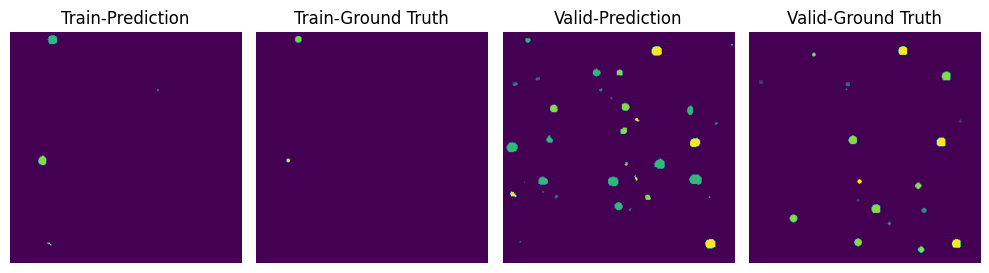

Train-Epoch: 30, Loss: 0.022737956123257224:  96%|█████████▌| 110/115 [00:18<00:00,  5.86it/s]
Train-nshuffle-Epoch: 30, Loss: 0.02357242570211858: 100%|██████████| 460/460 [00:18<00:00, 24.56it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 30, TRAIN_SCORE: 0.05802331129119452


Valid-Epoch: 30, Loss: 1.3144025101249535: 100%|██████████| 184/184 [00:06<00:00, 27.06it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 30, VALID_SCORE: 0.06962455454639277


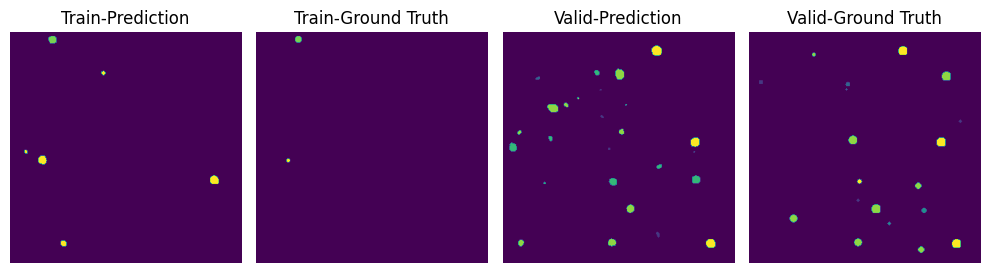

Train-Epoch: 31, Loss: 0.021749155113304202:  96%|█████████▌| 110/115 [00:18<00:00,  5.82it/s]
Train-nshuffle-Epoch: 31, Loss: 0.013578916680252524: 100%|██████████| 460/460 [00:16<00:00, 28.20it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 31, TRAIN_SCORE: 0.07589196478295085


Valid-Epoch: 31, Loss: 1.3447758840604522: 100%|██████████| 184/184 [00:07<00:00, 25.50it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 31, VALID_SCORE: 0.06871624260920295


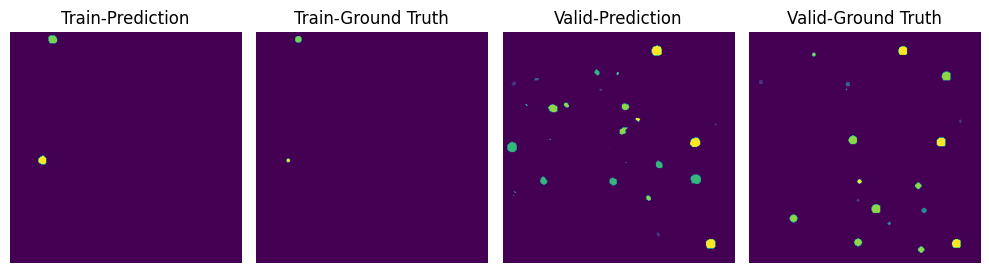

Train-Epoch: 32, Loss: 0.016649871996328742:  96%|█████████▌| 110/115 [00:18<00:00,  5.93it/s]
Train-nshuffle-Epoch: 32, Loss: 0.013465367946311903: 100%|██████████| 460/460 [00:15<00:00, 29.04it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 32, TRAIN_SCORE: 0.06424943183238317


Valid-Epoch: 32, Loss: 1.367270390776985: 100%|██████████| 184/184 [00:07<00:00, 25.27it/s]   


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 32, VALID_SCORE: 0.0682273467159872


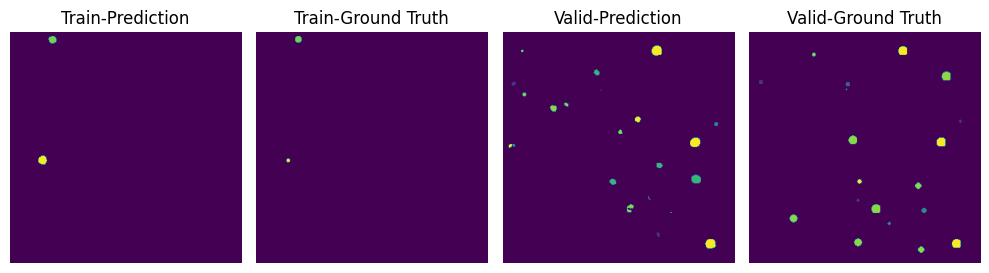

Train-Epoch: 33, Loss: 0.015122665923131122:  96%|█████████▌| 110/115 [00:18<00:00,  6.02it/s]
Train-nshuffle-Epoch: 33, Loss: 0.014901039496338775: 100%|██████████| 460/460 [00:16<00:00, 27.22it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 33, TRAIN_SCORE: 0.06144052377441309


Valid-Epoch: 33, Loss: 1.1311445040807049: 100%|██████████| 184/184 [00:06<00:00, 28.52it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 33, VALID_SCORE: 0.05857918141899514


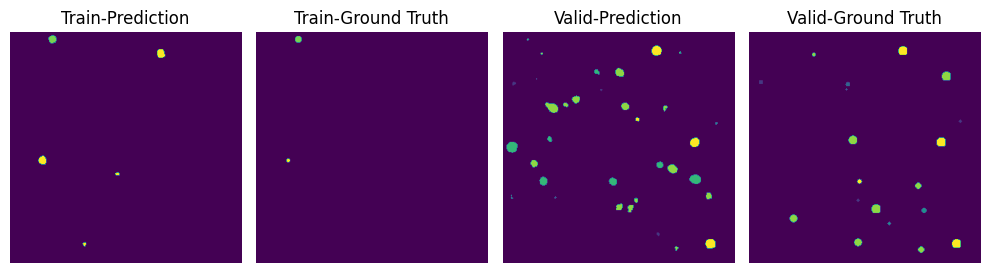

Train-Epoch: 34, Loss: 0.017995588149113412:  96%|█████████▌| 110/115 [00:18<00:00,  5.88it/s]
Train-nshuffle-Epoch: 34, Loss: 0.03502603653975277: 100%|██████████| 460/460 [00:16<00:00, 28.24it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 34, TRAIN_SCORE: 0.05384766329836862


Valid-Epoch: 34, Loss: 1.4374767390575511: 100%|██████████| 184/184 [00:06<00:00, 27.31it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 34, VALID_SCORE: 0.05261190933955012


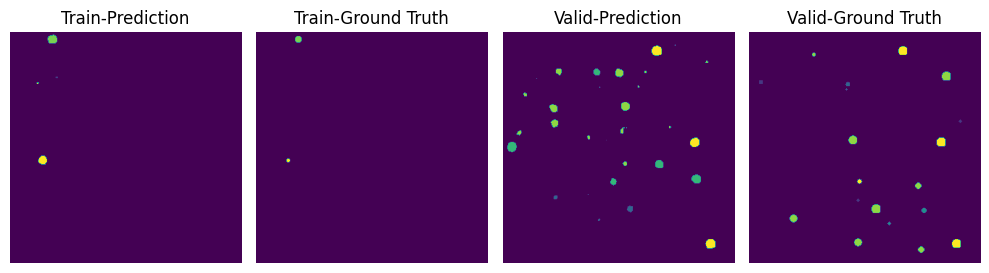

Train-Epoch: 35, Loss: 0.015127513141752305:  96%|█████████▌| 110/115 [00:18<00:00,  5.99it/s]
Train-nshuffle-Epoch: 35, Loss: 0.013957323585782434: 100%|██████████| 460/460 [00:15<00:00, 28.96it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 35, TRAIN_SCORE: 0.06064833340053153


Valid-Epoch: 35, Loss: 1.3182693333304127: 100%|██████████| 184/184 [00:06<00:00, 26.58it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 35, VALID_SCORE: 0.05996277858426484


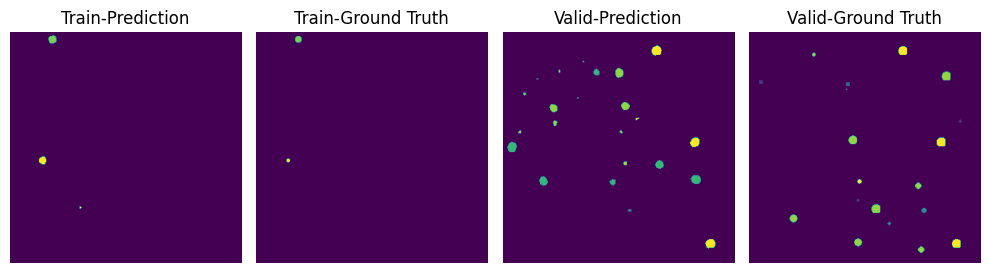

Train-Epoch: 36, Loss: 0.015683146300513973:  96%|█████████▌| 110/115 [00:18<00:00,  5.86it/s]
Train-nshuffle-Epoch: 36, Loss: 0.017064833713147497: 100%|██████████| 460/460 [00:15<00:00, 29.02it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 36, TRAIN_SCORE: 0.05561121127239638


Valid-Epoch: 36, Loss: 1.1290709414954663: 100%|██████████| 184/184 [00:06<00:00, 26.36it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 36, VALID_SCORE: 0.05761917072607557


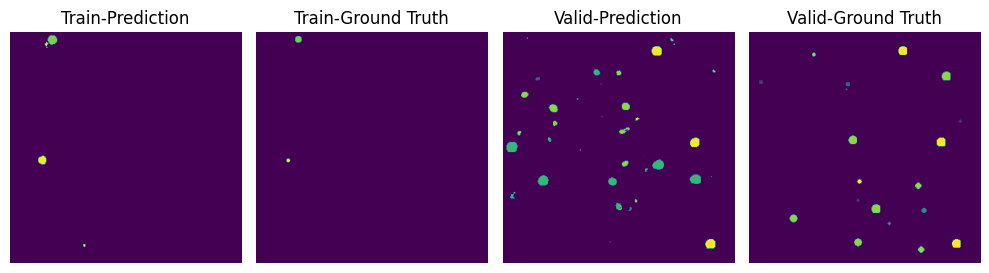

Train-Epoch: 37, Loss: 0.015116068631124852:  96%|█████████▌| 110/115 [00:18<00:00,  5.94it/s]
Train-nshuffle-Epoch: 37, Loss: 0.011863618155779397: 100%|██████████| 460/460 [00:16<00:00, 28.44it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 37, TRAIN_SCORE: 0.07657504527831752


Valid-Epoch: 37, Loss: 1.4278274260154633: 100%|██████████| 184/184 [00:06<00:00, 27.57it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 37, VALID_SCORE: 0.057339823613966945


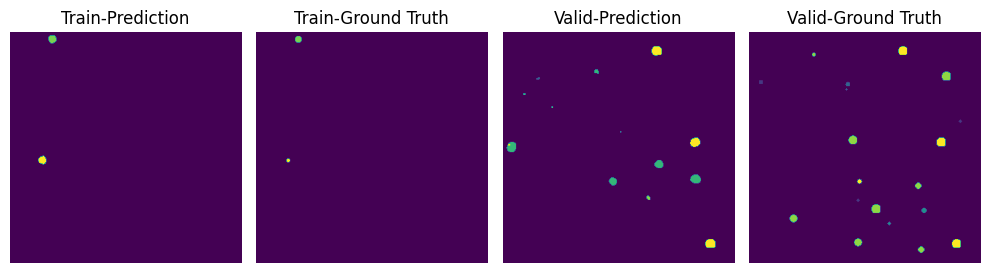

Train-Epoch: 38, Loss: 0.01522535646138501:  96%|█████████▌| 110/115 [00:18<00:00,  5.81it/s] 
Train-nshuffle-Epoch: 38, Loss: 0.01745717659609711: 100%|██████████| 460/460 [00:16<00:00, 27.70it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 38, TRAIN_SCORE: 0.055537036745299105


Valid-Epoch: 38, Loss: 1.491188282195609: 100%|██████████| 184/184 [00:06<00:00, 26.62it/s]   


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 38, VALID_SCORE: 0.0646367858447226


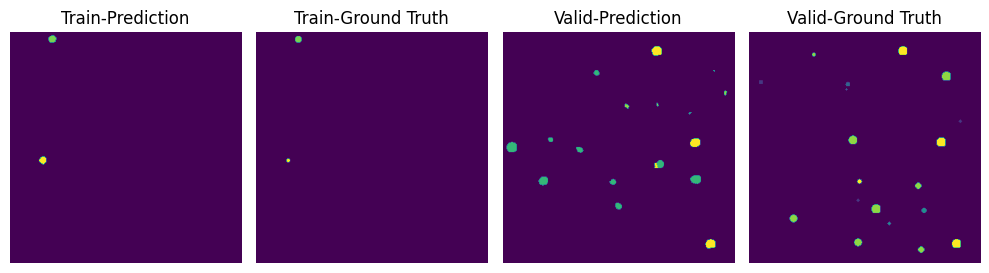

Train-Epoch: 39, Loss: 0.01783691295845942:  96%|█████████▌| 110/115 [00:18<00:00,  5.88it/s] 
Train-nshuffle-Epoch: 39, Loss: 0.018054847812590712: 100%|██████████| 460/460 [00:16<00:00, 27.14it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 39, TRAIN_SCORE: 0.0481853087381506


Valid-Epoch: 39, Loss: 1.1190705815470605: 100%|██████████| 184/184 [00:06<00:00, 28.24it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 39, VALID_SCORE: 0.050118832486462234


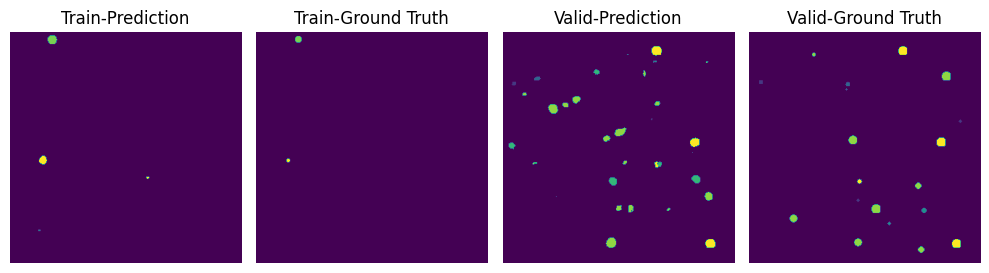

Train-Epoch: 40, Loss: 0.020434984128752894:  96%|█████████▌| 110/115 [00:18<00:00,  5.92it/s]
Train-nshuffle-Epoch: 40, Loss: 0.014929785851437255: 100%|██████████| 460/460 [00:16<00:00, 28.24it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 40, TRAIN_SCORE: 0.05806823451446099


Valid-Epoch: 40, Loss: 1.1022538743733963: 100%|██████████| 184/184 [00:06<00:00, 28.76it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 40, VALID_SCORE: 0.06233181720806111


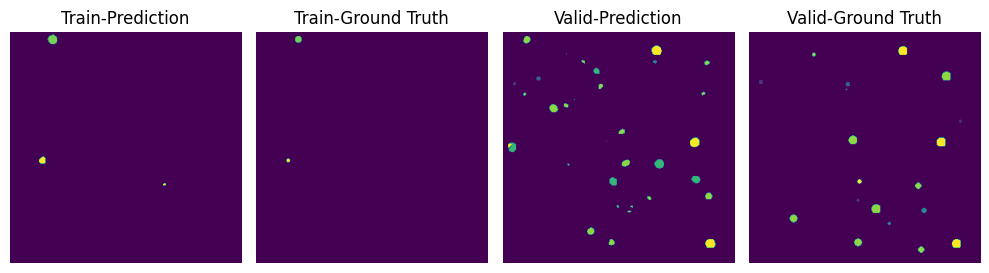

Train-Epoch: 41, Loss: 0.015779525065921587:  96%|█████████▌| 110/115 [00:18<00:00,  5.92it/s]
Train-nshuffle-Epoch: 41, Loss: 0.013607718433084538: 100%|██████████| 460/460 [00:16<00:00, 27.84it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 41, TRAIN_SCORE: 0.07236898554214614


Valid-Epoch: 41, Loss: 1.4094727793820747: 100%|██████████| 184/184 [00:07<00:00, 25.36it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 41, VALID_SCORE: 0.07873812402471175


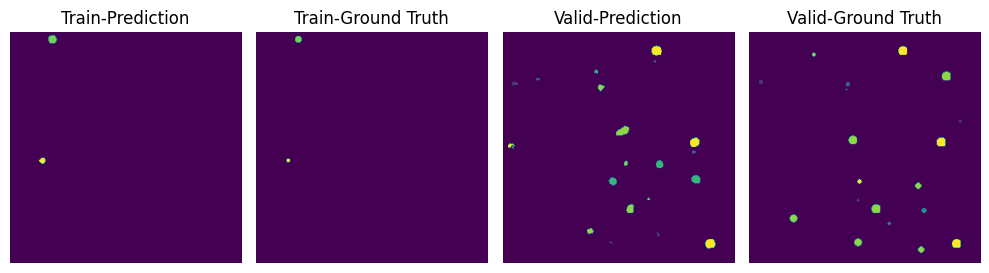

Train-Epoch: 42, Loss: 0.016977668934586375:  96%|█████████▌| 110/115 [00:18<00:00,  5.94it/s]
Train-nshuffle-Epoch: 42, Loss: 0.018403991789694325:  54%|█████▍    | 250/460 [00:08<00:06, 30.62it/s]

In [ ]:
model = UNet_2D().to("cuda")
model.eval()


optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss(
    # weight=torch.tensor([0, 0.1000, 14.4163, 14.1303, 1.0000, 2.2055, 4.4967]).to(
    #     "cuda"
    # )
    weight=torch.tensor([0.5, 32, 32, 32, 32, 32, 32]).to("cuda")
)
# criterion = DiceLoss()

best_model = None
best_score = 0
batch_size = 4

for epoch in range(100):
    train_loss = []
    valid_loss = []
    train_pred_tomogram = defaultdict(list)
    train_gt_tomogram = defaultdict(list)
    valid_pred_tomogram = defaultdict(list)
    valid_gt_tomogram = defaultdict(list)
    model.train()
    tq = tqdm(range(len(train_loader) * normalized_tomogram.shape[0] // batch_size))
    for data in train_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"]
        segmentation_map = data["segmentation_map"].long()

        for i in range(batch_size, tomogram.shape[1], batch_size):
            optimizer.zero_grad()
            from_, to_ = 0, tomogram.shape[1]
            random_index = random.sample(range(from_, to_), batch_size)
            input_ = tomogram[:, random_index]
            input_ = input_.permute(1, 0, 2, 3)  # (batch_size, 1, 160, 160)
            gt = segmentation_map[:, random_index].squeeze()  # (batch_size, 160, 160)

            # input_, gt = aug(input_, gt)

            input_ = input_.to("cuda")
            gt = gt.to("cuda")
            output = model(input_)
            loss = criterion(output, gt)
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
            tq.set_description(f"Train-Epoch: {epoch}, Loss: {np.mean(train_loss)}")
            tq.update(1)

    tq.close()

    ############################################# train-nshuffle #############################################
    model.eval()
    train_loss = []
    tq = tqdm(range(len(train_nshuffle_loader) * normalized_tomogram.shape[0]))
    for data in train_nshuffle_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"].to("cuda")
        segmentation_map = data["segmentation_map"].to("cuda").long()

        for i in range(tomogram.shape[1]):
            input_ = tomogram[:, i].unsqueeze(0)
            gt = segmentation_map[:, i]

            output = model(input_)
            loss = criterion(output, gt)

            train_loss.append(loss.item())
            tq.set_description(
                f"Train-nshuffle-Epoch: {epoch}, Loss: {np.mean(train_loss)}"
            )
            tq.update(1)

            train_pred_tomogram[exp_name].append(output.cpu().detach().numpy())
            train_gt_tomogram[exp_name].append(gt.cpu().detach().numpy())
    tq.close()

    train_score_ = visualize_epoch_results(
        train_pred_tomogram,
        train_gt_tomogram,
        sikii_dict=CFG.initial_sikii,
    )

    print(f"EPOCH: {epoch}, TRAIN_SCORE: {train_score_}")

    # 可視化
    index = 20

    plt.figure(figsize=(10, 5))

    ax = plt.subplot(1, 4, 1)
    ax.imshow(train_pred_tomogram[exp_name][index].squeeze(0).argmax(0))
    ax.set_title("Train-Prediction")
    ax.axis("off")

    ax = plt.subplot(1, 4, 2)
    ax.imshow(train_gt_tomogram[exp_name][index].squeeze(0))
    ax.set_title("Train-Ground Truth")
    ax.axis("off")

    ############################################# valid #############################################

    model.eval()
    tq = tqdm(range(len(valid_loader) * normalized_tomogram.shape[0]))
    for data in valid_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"].to("cuda")
        segmentation_map = data["segmentation_map"].to("cuda").long()

        for i in range(tomogram.shape[1]):
            input_ = tomogram[:, i].unsqueeze(0)
            gt = segmentation_map[:, i]

            output = model(input_)
            loss = criterion(output, gt)

            valid_loss.append(loss.item())
            tq.set_description(f"Valid-Epoch: {epoch}, Loss: {np.mean(valid_loss)}")
            tq.update(1)

            valid_pred_tomogram[exp_name].append(output.cpu().detach().numpy())
            valid_gt_tomogram[exp_name].append(gt.cpu().detach().numpy())
    tq.close()

    valid_score_ = visualize_epoch_results(
        valid_pred_tomogram,
        valid_gt_tomogram,
        sikii_dict=CFG.initial_sikii,
    )

    print(f"EPOCH: {epoch}, VALID_SCORE: {valid_score_}")

    if valid_score_ > best_score:
        best_score = valid_score_
        best_model = model
        torch.save(model.state_dict(), f"best_model.pth")

    ax = plt.subplot(1, 4, 3)
    ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
    ax.set_title("Valid-Prediction")
    ax.axis("off")

    ax = plt.subplot(1, 4, 4)
    ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
    ax.set_title("Valid-Ground Truth")
    ax.axis("off")

    plt.tight_layout()

    plt.show()

    # save_images(
    #     train_gt_tomogram=train_gt_tomogram,
    #     train_pred_tomogram=train_pred_tomogram,
    #     valid_gt_tomogram=valid_gt_tomogram,
    #     valid_pred_tomogram=valid_pred_tomogram,
    #     save_dir="images",
    #     epoch=epoch,
    # )

In [ ]:
train_pred_tomogram["TS_5_4"][index].squeeze(0).argmax(0).shape

In [ ]:
train_gt_tomogram["TS_5_4"][index].squeeze(0).shape

In [ ]:
# 可視化
index = 50

plt.figure(figsize=(10, 5))

# ax = plt.subplot(1, 4, 1)
# ax.imshow(train_pred_tomogram[exp_name][index].argmax(0))
# ax.set_title("Train-Prediction")
# ax.axis("off")

# ax = plt.subplot(1, 4, 2)
# ax.imshow(train_gt_tomogram[exp_name][index])
# ax.set_title("Train-Ground Truth")
# ax.axis("off")

ax = plt.subplot(1, 2, 1)
ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
ax.set_title("Valid-Prediction")
ax.axis("off")

ax = plt.subplot(1, 2, 2)
ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
ax.set_title("Valid-Ground Truth")
ax.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
train_score_ = visualize_epoch_results(
    train_pred_tomogram,
    train_gt_tomogram,
    sikii_dict=CFG.initial_sikii,
)

print(f"EPOCH: {epoch}, VALID_SCORE: {train_score_}")